# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

###  columns description:

*  PatientId | the ID of each patient

*  AppointmentID | the ID of each appointment 

*  Gender  | the gender of each patient (male or female)

*  scheduledDay  | tells us on what day the patient set up their appointment 

*  Agey | the age of each patient

*  Neighbourhood  | indicates the location of the hospital 

*  Scholarship | indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família

*  Hypertension | indicates whether or not the patient has Hypertension (0,1)

*  Diabetes | indicates whether or not the patient has Diabetes (0,1)

*  Alcoholism | indicates whether or not the patient is Alcoholic (0,1)

*  Handicap | indicates whether or not the patient is Handicaped (0,1,2,3,4)

*  sms_received | indicates whether or not the patient has received a sms for the appointment(0,1)

*  No-show | indicates whether or not the patient has showed up for their appointment(Yes,No)

*  week day   | the name of the day of the apointment date 




### Question(s) for Analysis
* 1) Which gender is more likely to show up?
* 2) Which age criteria is more likely to show up?
* 3) Is the scheduled date according to appointment date an indicator in order to predict if a patient will show up for their scheduled appointment?
* 4) Which day of the week have the highest show up rates?
* 5) Is the hospital location an indicator in order to predict if a patient will show up for their scheduled appointment? and which neighbourhoods have the highest show-up rate?
* 6) Would patients enrolled in Brasilian welfare program have higher show up rates?
* 7) Are the Diseases an indicator in order to predict if a patient will show up for their scheduled appointment?
* 8) Is receiving an SMS increases the show up rates?

In [1]:
#importing needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import time

<a id='wrangling'></a>
## Data Wrangling


In [2]:
#loading the data and printing some lines
df=pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#invistigating the columns' data types and checking for null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* seems like we need to change the ScheduledDay and AppointmentDay data types to dates and patient id into integers
* there is no null values

In [4]:
#data shape
df.shape

(110527, 14)

the data has 110527 rowsand 14 columns

In [5]:
#checking for duplicates
df.duplicated().sum()

0

* the data has no duplicates

In [6]:
#checking for unvalid values in the No-show and Gender columns
print(df['No-show'].unique())
print(df['Gender'].unique())

['No' 'Yes']
['F' 'M']


* the No-show and Gender columns have no unvalid values

In [7]:
#checking for unvalid values in the age column
print(df['Age'].unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]


* the age has negative values which should be removed

In [8]:
#checking for unvalid values in the rest of the columns
print(df['Scholarship'].unique())
print(df['Hipertension'].unique())
print(df['Diabetes'].unique())
print(df['Scholarship'].unique())
print(df['Handcap'].unique())
print(df['SMS_received'].unique())

[0 1]
[1 0]
[0 1]
[0 1]
[0 1 2 3 4]
[0 1]


In [9]:
#seeing some statistics on the numaric columns
df[['Age','Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']].describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* again we realize the negative values in the age and there is an outlier but it won't affect our analysis
* the rest of the data seems fine

### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

In [10]:
#renaming the columns as some columns were miss-spelled
labels=['PatientId','AppointmentID','Gender','ScheduledDay','AppointmentDay','Age','Neighbourhood','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','sms_received','No-show']
df.columns=labels
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,sms_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#removing negative values from the Age column
df = df.drop(df[df.Age < 0].index)
print(df['Age'].unique())

[ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99]


In [12]:
#correcting the ScheduledDay and AppointmentDay data types from strings to dates
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df.dtypes

PatientId                     float64
AppointmentID                   int64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hypertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handicap                        int64
sms_received                    int64
No-show                        object
dtype: object

In [13]:
#seems like we won't be needing the PatientId column in our analysis so we are dropping it
df.drop('PatientId',axis=1, inplace = True) 
df.columns

Index(['AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age',
       'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes',
       'Alcoholism', 'Handicap', 'sms_received', 'No-show'],
      dtype='object')

In [14]:
#creating a week day column which is the name of the day of the apointment date as it would be needed in the analysis
df['week day'] = df['AppointmentDay'].dt.day_name()
df['week day'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: week day, dtype: int64

In [15]:
#checking if there is inconsitant dates between the appointment day and the scheduled day
df.query('AppointmentDay.dt.date < ScheduledDay.dt.date').count()

AppointmentID     5
Gender            5
ScheduledDay      5
AppointmentDay    5
Age               5
Neighbourhood     5
Scholarship       5
Hypertension      5
Diabetes          5
Alcoholism        5
Handicap          5
sms_received      5
No-show           5
week day          5
dtype: int64

In [16]:
#removing the inconsistant days by making a query 
#that selects the appointment dates that are after or at the same date as the scheduled date
df=df.query('AppointmentDay.dt.date>=ScheduledDay.dt.date')
df.query('AppointmentDay.dt.date < ScheduledDay.dt.date').count()

AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
sms_received      0
No-show           0
week day          0
dtype: int64

In [17]:
#making a data frame with only the patient who showed up at their appoinment
show_up=df.loc[df['No-show']=="No"]
show_up.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,sms_received,No-show,week day
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
2,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
3,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [18]:
#making a data frame with only the patient who didn't show up at their appoinment
no_show_up=df.loc[df['No-show']=="Yes"]
no_show_up.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,sms_received,No-show,week day
6,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday
7,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39,GOIABEIRAS,0,0,0,0,0,0,Yes,Friday
11,5620163,M,2016-04-26 08:44:12+00:00,2016-04-29 00:00:00+00:00,29,NOVA PALESTINA,0,0,0,0,0,1,Yes,Friday
17,5633460,F,2016-04-28 09:28:57+00:00,2016-04-29 00:00:00+00:00,40,CONQUISTA,1,0,0,0,0,0,Yes,Friday
20,5626083,F,2016-04-27 07:51:14+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,Yes,Friday


<a id='eda'></a>
## Exploratory Data Analysis


In [19]:
# a function to set the x,y labels and the title of the plot
def plot_labels(ax,xlabel,ylabel,title):
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    return ax

In [20]:
# a funcion that returns the value count of a column with a specific condition(value)
def count_column(df,col,cond):
    ans=df[col].value_counts()[cond]
    return ans

In [21]:
# a function that calculates the proportion of a column with a specific condition(value) using the count_column function
def calc_prop(df1,df2,col,cond):
    ans=count_column(df1,col,cond)/count_column(df2,col,cond)
    return ans

In [22]:
# a function that plots a grouped bar plot that shows the count of who showed up and who didn't 
#in a relation with two data realted categories with the bar readings and labels ,etc
def grouped_plot(list1,list2,labels,colors,xlabel,ylabel,title):
    xticks = ['Show Up','Didn\'t Show Up']
    x = np.arange(len(xticks))  # the label locations
    width = 0.35  
    fig, ax = plt.subplots(figsize=(7, 7))
    bar1 = ax.bar(x - width/2, list1, width, label=labels[0],color=colors[0])
    bar2 = ax.bar(x + width/2, list2, width, label=labels[1],color=colors[1])
    ax=plot_labels(ax,xlabel,ylabel,title)
    ax.set_xticks(x, xticks)
    ax.legend()
    ax.bar_label(bar1)
    ax.bar_label(bar2)
    plt.show

In [23]:
# a function that plots a grouped bar plot that shows the count of who showed up and who didn't 
#in a relation with a column of the data with the bar readings and labels ,etc
# using the grouped_data function
def compare_plot(col,cond1,cond2,labels,colors,xlabel,ylabel,title):
    list1=[show_up[col].value_counts()[cond1],no_show_up[col].value_counts()[cond1]]
    list2 =[show_up[col].value_counts()[cond2],no_show_up[col].value_counts()[cond2]]
    grouped_plot(list1,list2,labels,colors,xlabel,ylabel,title)

In [24]:
# a function that plots a bar plot with the bar readings and labels ,etc
def bar_plot(labels,xticks,colors,xlabel,ylabel,title):
    fig, ax = plt.subplots(figsize=(7, 7))
    bar1 = ax.bar(labels , xticks,color=colors)
    ax=plot_labels(ax,xlabel,ylabel,title)
    ax.bar_label(bar1)
    plt.show()

In [25]:
# a function that calculates the proportios of a column and  plots a bar plot using seaborn
def sns_prop(df1,df2,ax,col,xlabel,ylabel,title):
    prop_list=df1[col].value_counts()/df2[col].value_counts()
    prop_list.sort_values(ascending=False,inplace=True)
    ax=sns.barplot(x=prop_list.index,y=prop_list)
    ax=plot_labels(ax,xlabel,ylabel,title)

In [26]:
# a function that plots a count plot using seaborn
def count_plot(ax,col):
    ax=sns.countplot(data=df, x=col)
    ax=plot_labels(ax,col,'count','')

### Gender related analysis
#### Which gender is more likely to show up?

<AxesSubplot:>

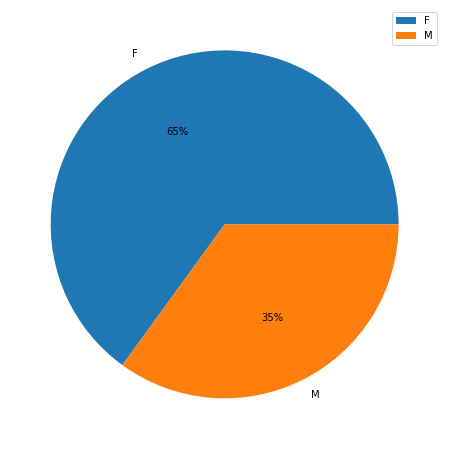

In [27]:
#plotting a pie chart of the gender counts percentage
df.groupby('Gender').size().plot(kind='pie', legend=True,figsize=(8,8), autopct='%1.0f%%')

* it's remarkable how women book appointments almost as double as men
* I would've checked the obstetrics department to see if it's related 

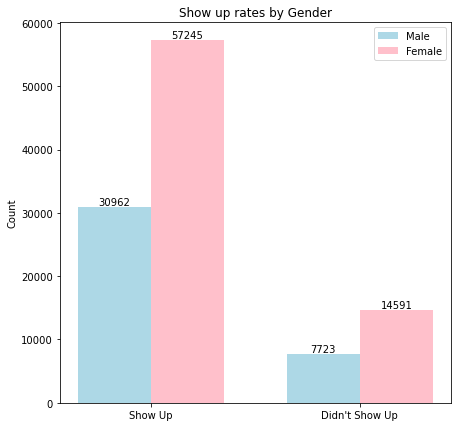

In [28]:
#creating a grouped bar plot showing the gender show up rates
labels=['Male','Female']
colors=['lightblue','pink']
compare_plot('Gender','M','F',labels,colors,'','Count','Show up rates by Gender')

* again we realize how women count is larger than the men

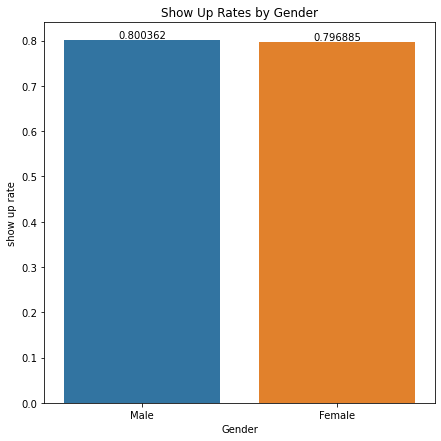

In [29]:
# creaing a bar plot that shows the proportions of Show Up Rates by Gender
fig, ax = plt.subplots(figsize=(7, 7))
sns_prop(show_up,df,ax,'Gender','Gender','show up rate','Show Up Rates by Gender')
ax.set_xticklabels(['Male','Female'])
ax.bar_label(ax.containers[0])
plt.show()

* seems like the difference is so slight and that males and females score almost 80% show up rate
* Gender won't be a great indicator in predicting if a patient will show up for their scheduled appointment

### Age related analysis
#### Which age criteria is more likely to show up?

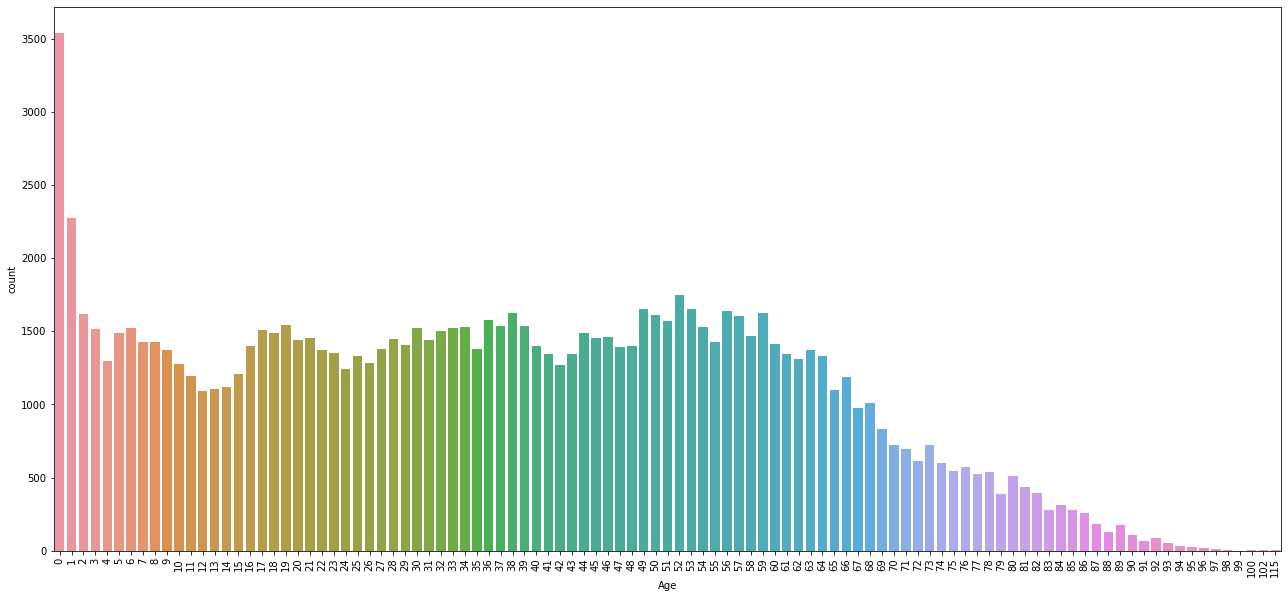

In [30]:
# creaing a seaborn count plot that shows the count of the age
fig, ax = plt.subplots(figsize=(22, 10))
count_plot(ax,'Age')
ax.tick_params(axis='x', rotation=90)
plt.show()

* looks like new born babies have appointments booked more than any other age
* the graph seems to be right skewed with more young age patients have appointments booked than older ones

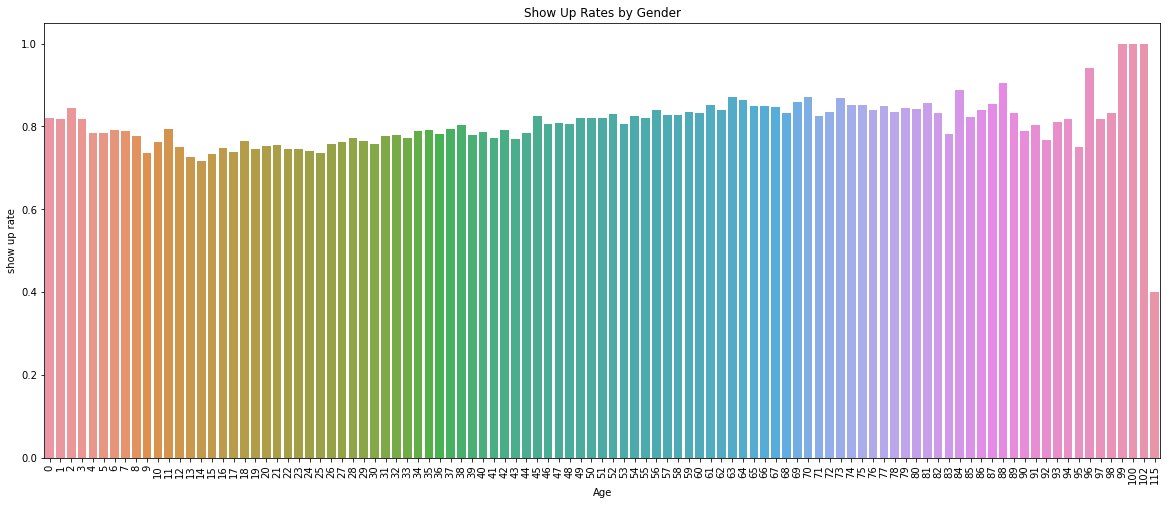

In [31]:
# creaing a bar plot that shows the proportions of Show Up Rates by Age
fig, ax = plt.subplots(figsize=(20, 8))
sns_prop(show_up,df,ax,'Age','Age','show up rate','Show Up Rates by Gender')
ax.tick_params(axis='x', rotation=90)
plt.show()

* looking at the age show up rates proportions all ages seems to have almost [70% - 80%] show up rates
* with higher rates of the patients at the ages [99,100,102] 
* but then it reaches almost 40% at the age 115

#### To have more insights at the age we would divide the age into 3 categoris kids ,Adults and Elders

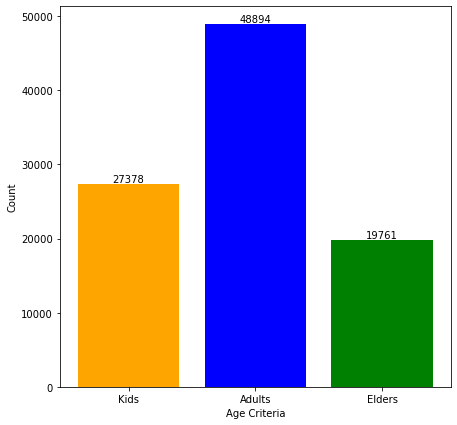

In [32]:
# dividing the age into 3 categoris kids ,Adults and Elders
# creaing a bar plot that shows the count of the age
labels=['Kids','Adults','Elders']
kids=sum(df['Age']<18) # kids with age<18
adults=sum((df['Age']>=18)&(show_up['Age']<60)) # adults who are older than 18 but younger than 60
elders=sum(df['Age']>60) # elders who are older than 60
colors=['orange','blue','green']
bar_plot(labels,[kids,adults,elders],colors,'Age Criteria','Count','')

* looks like adults book appointments  more that kids ad elders

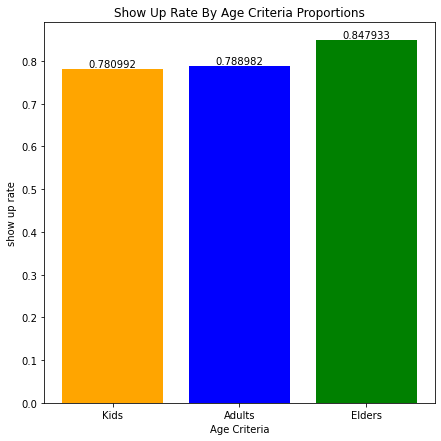

In [33]:
# creaing a bar plot that shows the proportions of Show Up Rates by Age categories
labels=['Kids','Adults','Elders']
kids_prop=sum(show_up['Age']<18)/sum(df['Age']<18)
adults_prop=sum((show_up['Age']>=18)&(show_up['Age']<60))/sum((df['Age']>=18)&(df['Age']<60))
elders_prop=sum(show_up['Age']>60)/sum((df['Age']>60))
colors=['orange','blue','green']
bar_plot(labels,[kids_prop,adults_prop,elders_prop],colors,'Age Criteria','show up rate','Show Up Rate By Age Criteria Proportions')

* by looking at the proportions of all age categories have almost the same show up rates (78%)
* but the elders have slightly higher show up rate (80%)

### Scheduled and Appointment dates related analysis
#### 1-Is the scheduled date according to appointment date an indicator in order to predict if a patient will show up for their scheduled appointment?
#### 2-Which day of the week have the highest show up rates?

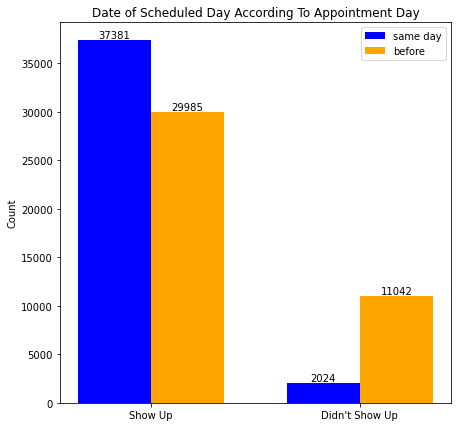

In [34]:
# dividing the age into 2 categoris
# appointments scheduled at the same day as the appointment day and appointments scheduled before the appointment day
# creating a grouped bar plot showing the show up rates according to scheduled date and appointment date
labels =  ['same day','before']
colors= ['blue','orange']
same_day =[sum((show_up.ScheduledDay.dt.day==show_up.AppointmentDay.dt.day)),sum((no_show_up.ScheduledDay.dt.day==no_show_up.AppointmentDay.dt.day))]
befor =[sum((show_up.ScheduledDay.dt.day<show_up.AppointmentDay.dt.day)),sum((no_show_up.ScheduledDay.dt.day<no_show_up.AppointmentDay.dt.day))]
grouped_plot(same_day,befor,labels,colors,'','Count','Date of Scheduled Day According To Appointment Day')

* looks like the count of appointments scheduled at the same day as the appointment day is almost equel to appointments scheduled before the appointment day

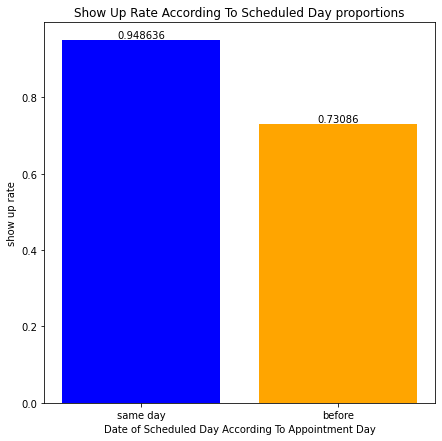

In [35]:
# creaing a bar plot that shows the proportions of Show Up Rates by scheduled date and appointment date
labels = ['same day','before']
same_day_prop =sum((show_up.ScheduledDay.dt.day==show_up.AppointmentDay.dt.day))/sum((df.ScheduledDay.dt.day==df.AppointmentDay.dt.day))
before_prop=sum((show_up.ScheduledDay.dt.day<show_up.AppointmentDay.dt.day))/sum((df.ScheduledDay.dt.day<df.AppointmentDay.dt.day))
bar_plot(labels,[same_day_prop,before_prop],['blue','orange'],'Date of Scheduled Day According To Appointment Day','show up rate','Show Up Rate According To Scheduled Day proportions')

* looks like people who scheduled at the same day as the appointment day show up more often almost 20% times more
* looks like scheduled date according to appointment date is a good indicator in  predicting if a patient will show up for their scheduled appointment

<AxesSubplot:>

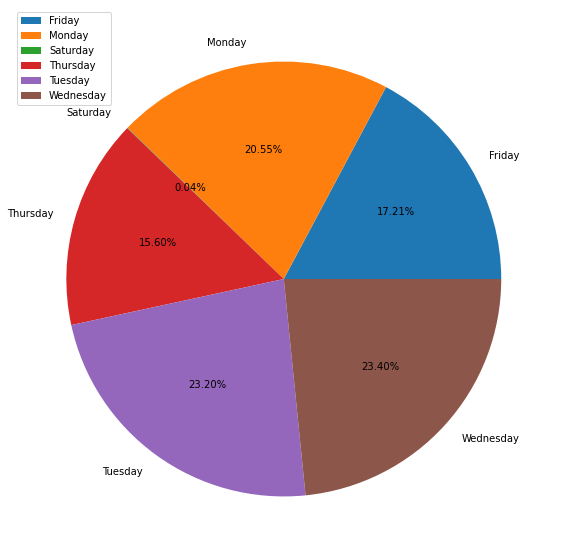

In [36]:
# Making a pie chart to invistigate the day of the week
df.groupby('week day').size().plot(kind='pie', legend=True,figsize=(10,10), autopct='%.2f%%')

* Looks like appointments schedualed at Saturday are significantly low
* Tuesday and Wednesday have the highest appointments schedualed

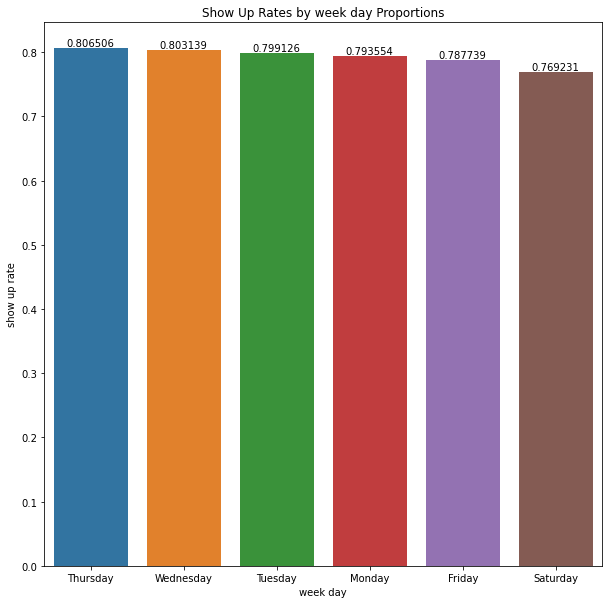

In [37]:
# creaing a bar plot that shows the proportions of week day of appointment date
fig, ax = plt.subplots(figsize=(10, 10))
sns_prop(show_up,df,ax,'week day','week day','show up rate','Show Up Rates by week day Proportions')
ax.bar_label(ax.containers[0])
plt.show()

* by looking at the proportions of the week day of the appointment dates have almost the same show up rates (80%)

### Neighbourhood related analysis
#### Is the hospital location an indicator in order to predict if a patient will show up for their scheduled appointment? and which neighbourhoods have the highest show-up rate?

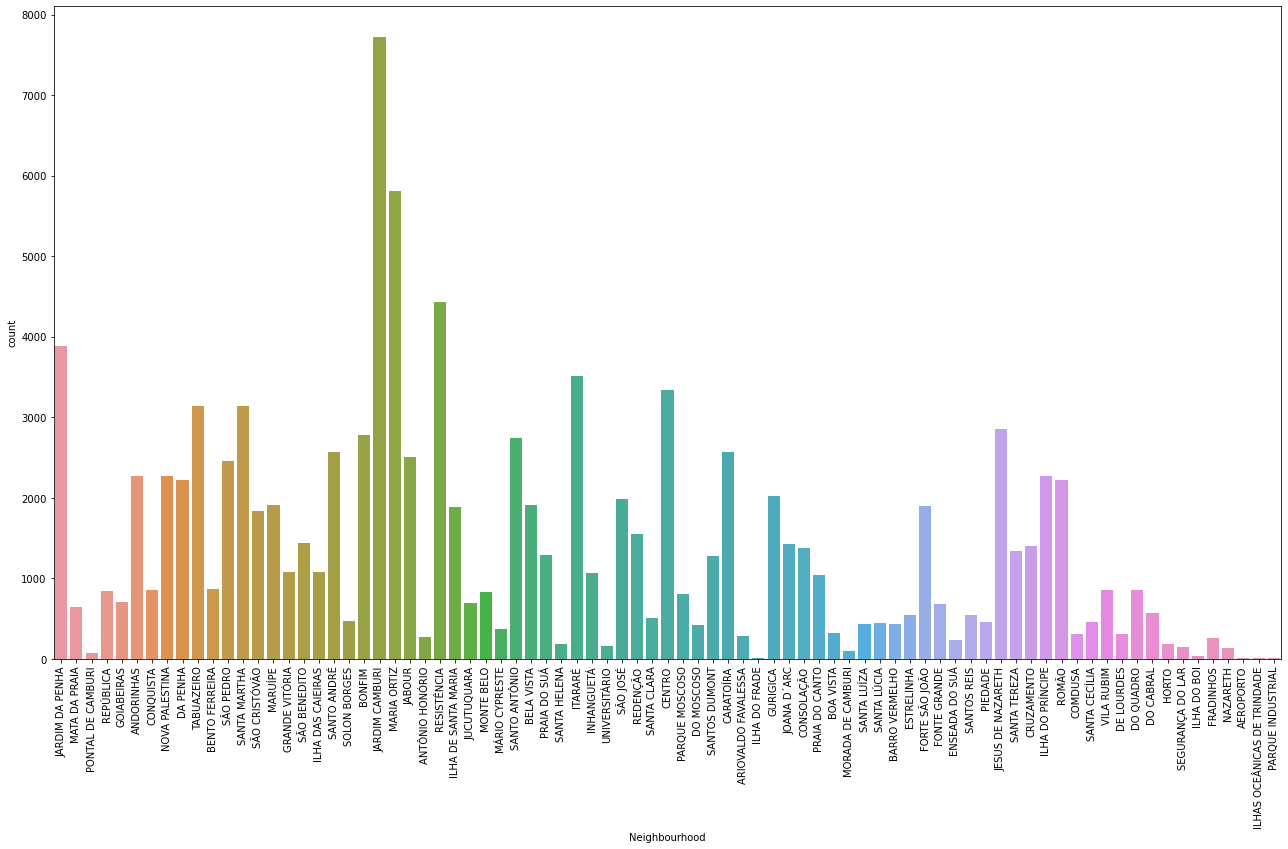

In [38]:
# creaing a seaborn count plot that shows the count of each Neighbourhood 
fig, ax = plt.subplots(figsize=(22, 12))
count_plot(ax,"Neighbourhood")
ax.tick_params(axis='x', rotation=90)
plt.show()

* there is a huge variations in the neighbourhoods seems like we would need further invistigations

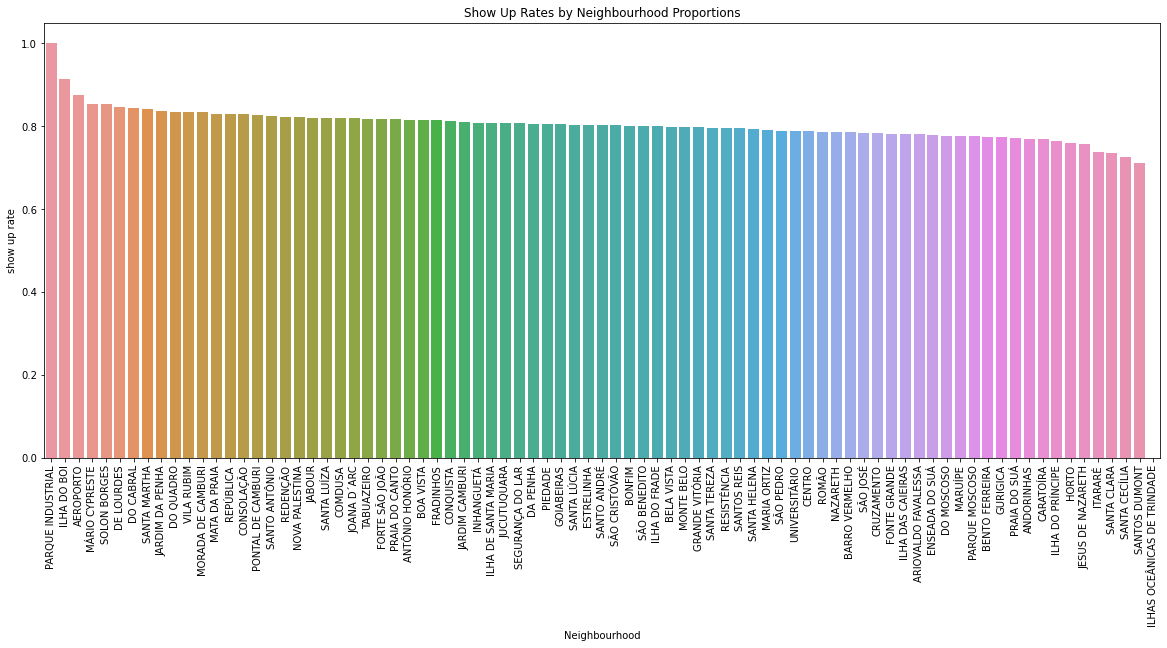

In [39]:
# creaing a bar plot that shows the proportions of Show Up Rates of each Neighbourhood 
fig, ax = plt.subplots(figsize=(20, 8))
sns_prop(show_up,df,ax,'Neighbourhood','Neighbourhood','show up rate','Show Up Rates by Neighbourhood Proportions')
ax.tick_params(axis='x', rotation=90)
plt.show()

* most of the neighbourhoods are equel except for the first and the last neighbourhood where the score 100% and 0%
* seems like we would need further invistigations

In [40]:
# invistigating the neighbourhood that scored 100%
df[df['Neighbourhood']=='ILHAS OCEÂNICAS DE TRINDADE']['No-show']

48754    Yes
48765    Yes
Name: No-show, dtype: object

* this Neighbourhood scored 100% because only 2 appointments were made which won't be sufficient for our analysis

In [41]:
# invistigating the neighbourhood that scored 0%
df[df['Neighbourhood']=='PARQUE INDUSTRIAL']['No-show']

75199    No
Name: No-show, dtype: object

* this Neighbourhood scored 0% because only 1 appointment was made which won't be sufficient for our analysis

In [42]:
# creating a series with neighbourhoods where there are more than 1000 appointments made
Neighbourhoods=show_up['Neighbourhood'].value_counts()>1000
Neighbourhoods_true=Neighbourhoods[Neighbourhoods==True]
Neighbourhoods_true

JARDIM CAMBURI         True
MARIA ORTIZ            True
RESISTÊNCIA            True
JARDIM DA PENHA        True
SANTA MARTHA           True
CENTRO                 True
ITARARÉ                True
TABUAZEIRO             True
SANTO ANTÔNIO          True
BONFIM                 True
JESUS DE NAZARETH      True
SANTO ANDRÉ            True
JABOUR                 True
CARATOÍRA              True
SÃO PEDRO              True
NOVA PALESTINA         True
DA PENHA               True
ANDORINHAS             True
ROMÃO                  True
ILHA DO PRÍNCIPE       True
GURIGICA               True
SÃO JOSÉ               True
FORTE SÃO JOÃO         True
ILHA DE SANTA MARIA    True
BELA VISTA             True
MARUÍPE                True
SÃO CRISTÓVÃO          True
REDENÇÃO               True
JOANA D´ARC            True
SÃO BENEDITO           True
CONSOLAÇÃO             True
CRUZAMENTO             True
SANTA TEREZA           True
Name: Neighbourhood, dtype: bool

In [43]:
# creating a data frame with those who showed up in neighbourhoods where there are more that 1000 appointments made 
show_up_Neighbourhood=show_up[show_up['Neighbourhood'].isin(Neighbourhoods_true.index)]
show_up_Neighbourhood.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,sms_received,No-show,week day
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
8,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,Friday
10,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,Friday


In [44]:
# creating a data frame with neighbourhoods where there are more that 1000 appointments made 
df_Neighbourhood=df[df['Neighbourhood'].isin(Neighbourhoods_true.index)]
show_up_Neighbourhood.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,sms_received,No-show,week day
0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
1,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
4,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday
8,5638447,F,2016-04-29 08:02:16+00:00,2016-04-29 00:00:00+00:00,21,ANDORINHAS,0,0,0,0,0,0,No,Friday
10,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30,NOVA PALESTINA,0,0,0,0,0,0,No,Friday


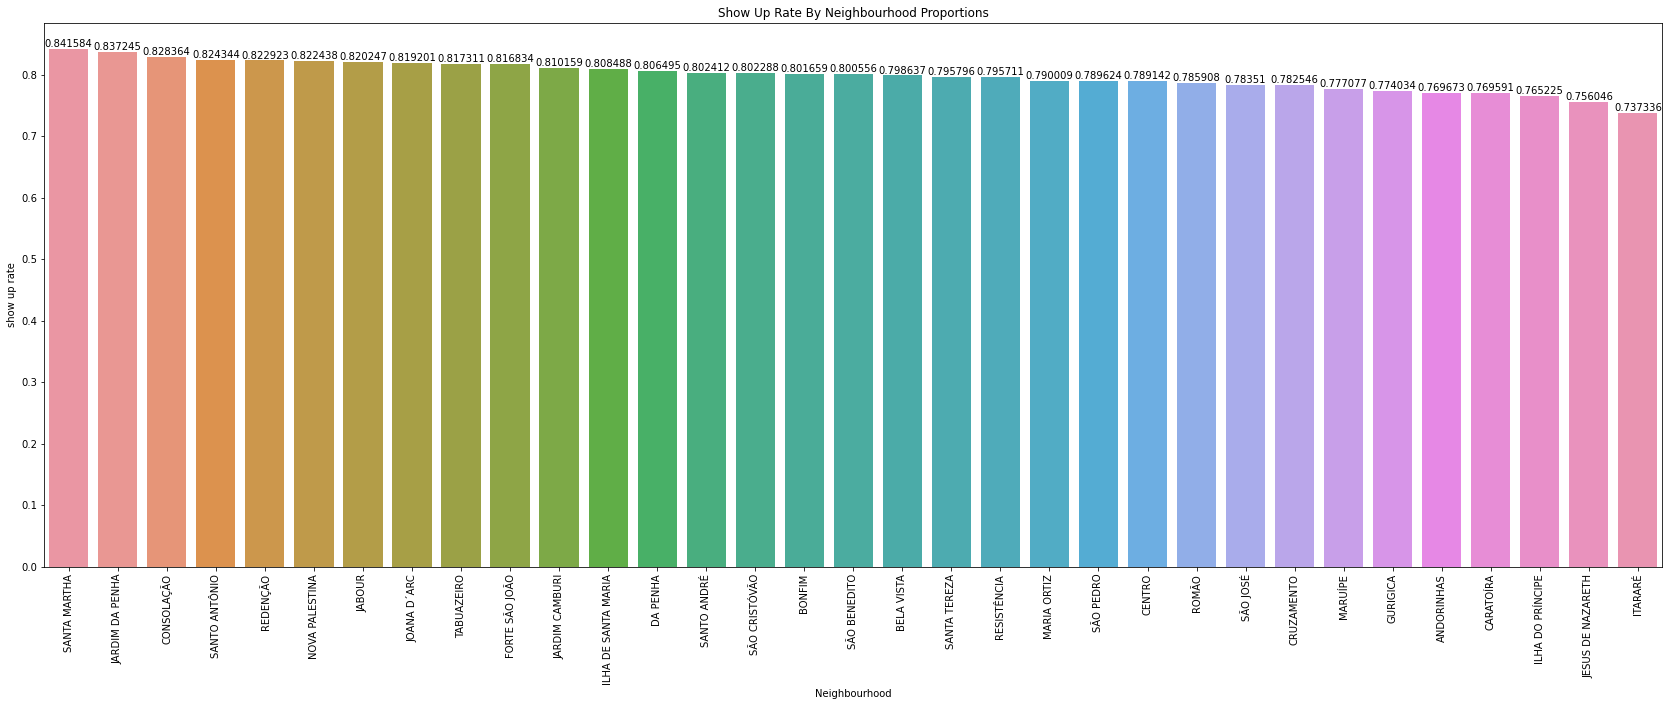

In [45]:
# creaing a bar plot that shows the proportions of Show Up Rates of each Neighbourhood
# where there are more than 1000 appointments made
fig, ax = plt.subplots(figsize=(29,10))
sns_prop(show_up_Neighbourhood,df_Neighbourhood,ax,'Neighbourhood','Neighbourhood','show up rate','Show Up Rate By Neighbourhood Proportions')
ax.tick_params(axis='x', rotation=90)
ax.bar_label(ax.containers[0])
plt.show()

* by looking at the proportions of neighbourhoods have very close show up rates (73% - 84%)

### Scholarship related analysis
#### Would patients enrolled in Brasilian welfare program have higher show up rates?

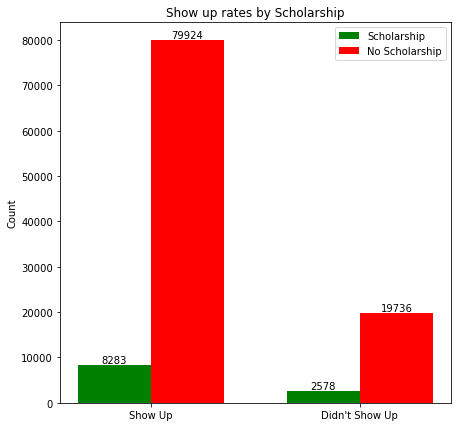

In [46]:
#creating a grouped bar plot showing the scholarship show up rates
colors=['green','red']
labels=['Scholarship','No Scholarship']
compare_plot('Scholarship',1,0,labels,colors,'','Count','Show up rates by Scholarship')

* it's remarkable how people enrolled in Brasilian welfare program make so little appointmets

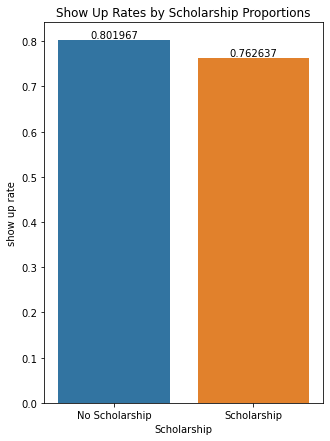

In [47]:
# creaing a bar plot that shows the proportions of Show Up Rates by Scholarship
fig, ax = plt.subplots(figsize=(5, 7))
sns_prop(show_up,df,ax,'Scholarship','Scholarship','show up rate','Show Up Rates by Scholarship Proportions')
ax.set_xticklabels(['No Scholarship','Scholarship'])
ax.bar_label(ax.containers[0])
plt.show()

* seems like the difference is so slight and that people enrolled in Brasilian welfare program scored 76% and those who aren't scored almost 80% show up rates

### Diseases related analysis
#### Are the Diseases an indicator in order to predict if a patient will show up for their scheduled appointment?

In [48]:
# calculating the value count of each desease
Hypertension=count_column(show_up,'Hypertension',1)
Diabetes=count_column(show_up,'Diabetes',1)
Alcoholism=count_column(show_up,'Alcoholism',1)
Handicap=show_up[show_up["Handicap"]>0].count()["Handicap"]

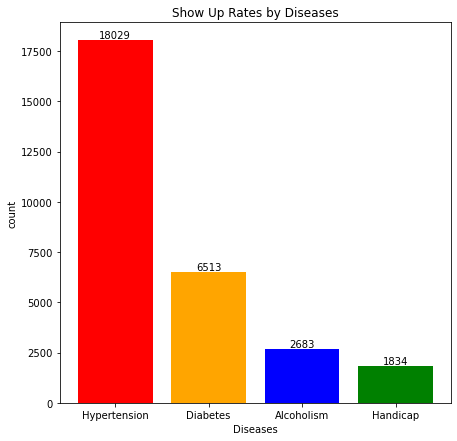

In [49]:
# creaing a bar plot that shows each diseases count
labels = ['Hypertension','Diabetes','Alcoholism','Handicap']
diseases=[Hypertension,Diabetes,Alcoholism,Handicap]
colors=['red','orange','blue','green']
bar_plot(labels,diseases,colors,'Diseases','count','Show Up Rates by Diseases')

* Hypertension patients make way more appointments than other diseases 

In [50]:
# calculating the proportion of each disease
Hypertension_prop=calc_prop(show_up,df,'Hypertension',1)
Diabetes_prop=calc_prop(show_up,df,'Diabetes',1)
Alcoholism_prop=calc_prop(show_up,df,'Alcoholism',1)
Handicap_prop=show_up[show_up["Handicap"]>0].count()["Handicap"]/sum((df.Handicap>0))

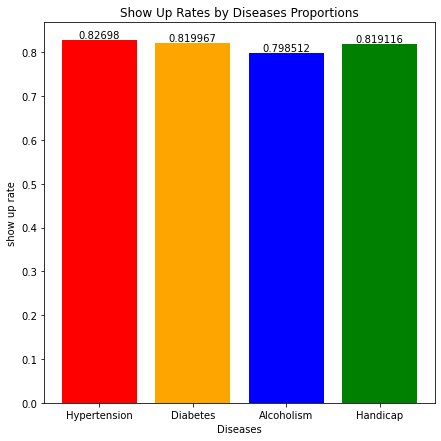

In [51]:
# creaing a bar plot that shows the proportions of Show Up Rates by disease
labels = ['Hypertension','Diabetes','Alcoholism','Handicap']
diseases_prop=[Hypertension_prop,Diabetes_prop,Alcoholism_prop,Handicap_prop]
colors=['red','orange','blue','green']
bar_plot(labels,diseases_prop,colors,'Diseases','show up rate','Show Up Rates by Diseases Proportions')

* seems like the difference is so slight and that disease have almost 80% show up rate
* disease won't be a great indicator in predicting if a patient will show up for their scheduled appointment

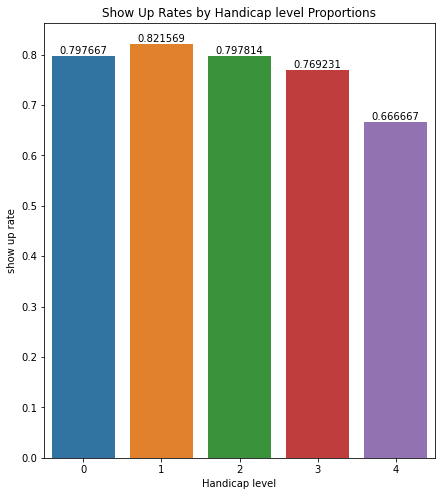

In [52]:
# creaing a bar plot that shows the proportions of Show Up Rates by Handicap level
fig, ax = plt.subplots(figsize=(7, 8))
sns_prop(show_up,df,ax,'Handicap','Handicap level','show up rate','Show Up Rates by Handicap level Proportions')
ax.bar_label(ax.containers[0])
plt.show()

* seems like the higher the handicap level the less that they show up 

### SMS related analysis
#### Is receiving an SMS increases the show up rates?

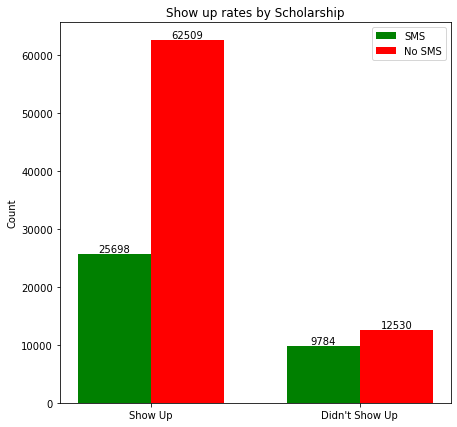

In [53]:
#creating a grouped bar plot showing the SMS received show up rates
labels=['SMS','No SMS']
colors=['green','red']
compare_plot('sms_received',1,0,labels,colors,'','Count','Show up rates by Scholarship')

* patients who receive SMSs are way less than those who receive it

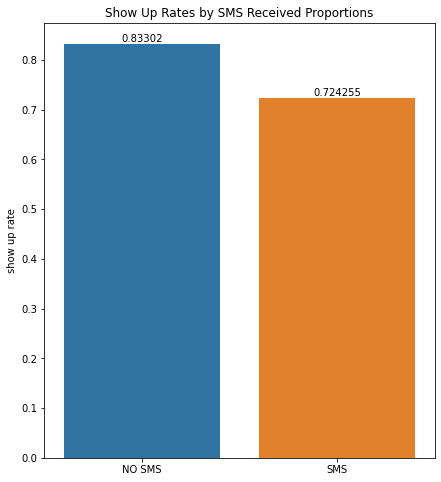

In [54]:
# creaing a bar plot that shows the proportions of Show Up Rates SMS received
fig, ax = plt.subplots(figsize=(7, 8))
sns_prop(show_up,df,ax,'sms_received','','show up rate','Show Up Rates by SMS Received Proportions')
ax.set_xticklabels(['NO SMS','SMS'])
ax.bar_label(ax.containers[0])
plt.show()

* looks like people who didn't receive SMSs show up more often almost 10% times more
* looks like SMS received is a good indicator in  predicting if a patient will show up for their scheduled appointment which is schoking and unpredicted

<a id='conclusions'></a>
## Conclusions
>**Gender**
   * It's remarkable how females book appointments almost as double as males but both genders scored about 80% show up rates          with slight difference indicating males show up more
   
>**Age**
* New born babies and 1 year olds have appointments booked more than any other age
* The age show up rates proportions of all ages seems to have almost [70% - 80%] show up rates
* with higher rates of the patients at the ages [99,100,102] 
* but then it reaches almost 40% at the age of 115
* Adults book appointments more than kids and elders
* Adults and kids have show up rates of 78%
* while the elders are more likely to show up at show up rate 85%

>**Scheduled date**
* The count of appointments scheduled at the same day as the appointment day is almost equel to appointments scheduled before the appointment day
* patients who scheduled at the same day as the appointment day show up 20% more than patients who scheduled before the appointment day

>**Appointment date**
* Appointments at Saturday are significantly low only 0.04% of the week
* Tuesday and Wednesday have the highest appointments schedualed
* All weekdays almost have the same proportions show-up rates (80%) while saturday is slightly lower with 76% show up rate

>**Neighbourhood**
* Neighbourhoods with more than 1000 appointments made have show up rates between (73% - 84%)
* Santa Martha is the neighbourhood with the heighest show up rate

>**Scholarship**
* people who are enrolled in the Brasilian welfare program scored 76% and those who aren't scored almost 80% show up rates
* patients who aren't enrolled in the program are more likely to show up

>**Diseases**
* Hypertension patients make way more appointments than other diseases 
* All diseases scored almost the same with 80% show up rates
* After investiagting the handicap patients it revealed that as the level of the handicap increases the show ap rates decreases

>**SMS**
* Patients who didn't receive SMSs show up more often almost 10% times more which is unpredictable

### Limitations
* There is an out lier is the age column (115)
* unpredictable outcome of the SMS analysis as it looks like people who do receive SMSs show up less than thoes who don't